# T03C01 Domain Research and Exploratory Data Analysis

## Note to the Reader

This task was originally designed for implentation in R. We have adapted it for implementation in python

## Your Task

__FROM:__ Kathy Narim-Nomstrom <br>
__Subject:__ Big news about a new project!

Hi,

I have exciting news. We’re about to close a deal with a regional home developer to develop analytics for a new set of electrical sub-metering devices used for power management in Smart Homes. Installing these sub-meters could be a big step towards the developer's goal of offering highly efficient Smart Homes that providing owners with power usage analytics.

As a starting point, they have provided us with a very large data set that contains 47 months of energy usage data from these devices. Our job over the next few weeks will be to analyze this data to determine what kind of analytics and visualizations can be created that would empower Smart Home owners with greater understanding and control of their power usage.

Since you are new at IOT Analytics, I’ll explain our onboarding process for new clients.

* Conduct research to become informed on the client’s business. In this case, you will need to get up to speed on the domains of Smart Homes, sub-meters and household power consumption.
* Identify any analytic skill/knowledge gaps foreseen for the project and plug those gaps with self-learning. With a data set this big, data munging and sub-setting will be essential to the analytic process. Working with DateTime and Time Series also needs to be mastered.
* Perform an initial exploration of the data. This exploration should be used to understand any potential issues, conduct early preprocessing, note summary statistics and identify any early recommendations about improvements to future data collection.
* Hold a project kick-off meeting with the client to close the deal. This meeting will center around a presentation that contains all of the project details and our initial exploration of the data.
* Your initial task is to work through the onboarding process and produce a PowerPoint presentation that will be delivered to the home developer’s management team during the kick off meeting. This report will give them confidence in our process and convince them that this project is relevant to their business needs.

It is important to remember that we do not know what the data will show, and neither does the home builder; it is your job to tell them how we will conduct the analysis and what they are likely to gain, so be precise and accurate with your findings and any initial recommendations. However, keep in mind that you will be presenting your report to business rather than technical people.

Well, the future of this project is in your capable hands! Gather the required resources and prove that the sub-metering devices will deliver the value the developer seeks through data analytics.

Good luck,

Kathy

VP, IOT Analytics

# Plan of Attack

## Introduction

### Plan of Attack

Kathy has asked you to produce an initial report to IOT Analytics' clients. Your report should be in the form of a PowerPoint presentation that explains the processes that you will follow during the analysis and also presents some initial insights of business relevance based on an initial look at the data. 

## Research the Domain - Become Familiar with the Clients Business

Our potential client’s goal with these sub-meters is to grow their business in the smart home market. As the chief analyst on this project you should start your work by conducting researching into the client’s domain. You can’t analyze something until you understand it.

In this case you will want to dive deep into smart homes and sub-meters. A good place to start would be reviewing existing players in this market. How do they define Smart Homes? What role do sub-meters play? What kinds of power usage analytics are currently offered? What can be learned from the analytics? What are the benefits to consumers?

Equally important in this early phase, is to study the data set documentation. The Electric Power Consumption Data Set documentation can be found on the Resources Tab. Documentation often provides insights you wouldn’t find by moving straight to data exploration. Do you understand all of the attributes or do you need to do some research to fill a knowledge gap? How is power measured? In what kind of units? What household areas are each of the sub-meters measuring? Is there additional power and power related information that would benefit analytics in the future if added to the data set? Are there any changes to the sub-metering data collection structure that would help future analytics?

Conduct your research thoroughly. Time spent on this step can greatly focus your analysis efforts later.

## Identify and Fill Skill/Knowledge Gaps

Preparing yourself with new skills is an essential step in analytics. New R packages and techniques will increase your growth as an analyst and your capabilities to tackle new projects

### Data Munging & Wrangling

Data munging and wrangling are common terms that describe the process of transforming raw data into forms that make it more useful for analysis. To increase your skill in data transformation, follow the tutorial on at the link below:

https://cran.r-project.org/web/packages/dplyr/vignettes/dplyr.html

The dataset for this tutorial is called nycflights13. You can download the package using the RStudio package downloader. See this link for more information: http://www.rpubs.com/howelb/32599

### DateTime

In R DateTime is a special class of attribute. It is neither character or numeric. There are several options for DateTime. We will explore several in the plan of attack. Review the link below for more information about DataTime in R. Your first work with DateTime is in the next step of the plan of attack. 

https://www.stat.berkeley.edu/~s133/dates.html

### Time Series Analysis

A Time Series is a set of data points measured at specific time intervals over a period of time. Time Series Analysis uncovers trends in the data and allows us to forecast future trends beyond the span of the time series. Use the links below to learn more. Task 2 will begin with a tutorial about subsetting for Time Series.

https://www.researchoptimus.com/article/what-is-time-series-analysis.php

https://en.wikipedia.org/wiki/Time_series 

## Obtain the data using SQL query

In previous tasks you have been provided with the data. The data for this project is currently stored on a database in several annual tables (yr_2006, yr_2007, yr_2008, yr_2009, yr_2010).  To get this data you will need to use the RMySQL package to query the database and retrieve your data.

Begin by installing the msql package

In [1]:
import mysql

### Create a database connection 

In [126]:
import pandas as pd
import numpy as np
import mysql.connector

host = 'data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com'
user = 'deepAnalytics'
passwd = 'Sqltask1234!'

con = mysql.connector.connect(host = host,
                              user = user,
                              passwd = passwd)
                              #dbname = 'dataanalytics2018')
cursor = con.cursor()

### Show the databases at the connection

In [127]:
cursor.execute("SHOW DATABASES")
db_list = [db[0] for db in cursor]
for db in db_list:
    print(db)

information_schema
dataanalytics2018
deepAnalytics
mysql
performance_schema
tmp


### List the tables contained in the database 

In [128]:
db_of_interest = db_list[1]
print('db_of_interest:',db_of_interest)

cursor.execute("USE "+db_of_interest)
df_table_list = pd.read_sql("SHOW TABLES", con=con)
df_table_list

db_of_interest: dataanalytics2018


,Tables_in_dataanalytics2018
0,iris
1,yr_2006
2,yr_2007
3,yr_2008
4,yr_2009
5,yr_2010


The resulting list shows that the database contains 6 tables. 

Let’s use the “iris” table as an example. To learn the attributes in that table, use the dbListFields command. If you have waited too long since connecting to the database you may have to connect again.

### Lists attributes contained in a table
The resulting list shows 6 attributes. 

In [18]:
df_columns = pd.read_sql("SHOW COLUMNS FROM iris", con=con)
display(df_columns)

,Field,Type,Null,Key,Default,Extra
0,id,int(11) unsigned,NO,PRI,None,auto_increment
1,SepalLengthCm,float,YES,,None,
2,SepalWidthCm,float,YES,,None,
3,PetalLengthCm,float,YES,,None,
4,PetalWidthCm,float,YES,,None,
5,Species,varchar(50),YES,,None,


### Use asterisk to specify all attributes for download
Still focusing on “iris”, we can query the database. We can download all of the data or choose the specific attributes we’re interested in. 

In [6]:
df = pd.read_sql('SELECT * FROM iris', con=con,index_col='id')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


### Use attribute names to specify specific attributes for download

In [7]:
df_subset = pd.read_sql('SELECT SepalLengthCm, SepalWidthCm FROM iris', con=con)
df_subset 

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


Now that you understand the workflow, let’s turn our attention to the data for this project. Earlier you used dbListTables to learn the 8 tables contained in the data set. Your data is in the following tables: yr_2006, yr_2007, yr_2008, yr_2009, yr_2010

Using the "SHOW COLUMNS" function to learn the attributes associated with the yr_2006 table.

In [8]:
df_columns = pd.read_sql("SHOW COLUMNS FROM yr_2006", con=con)
display(df_columns)

,Field,Type,Null,Key,Default,Extra
0,id,int(11) unsigned,NO,PRI,None,auto_increment
1,Date,text,YES,,None,
2,Time,text,YES,,None,
3,Global_active_power,float,YES,,None,
4,Global_reactive_power,float,YES,,None,
5,Global_intensity,float,YES,,None,
6,Voltage,float,YES,,None,
7,Sub_metering_1,float,YES,,None,
8,Sub_metering_2,float,YES,,None,
9,Sub_metering_3,float,YES,,None,


This project centers around visualizations and time series analysis of sub-meters. Given this, the data you should pull for each year should be Date, Time and the 3 sub-meter attributes.

Use the dbGetQuery function to download tables 2006 through 2010 with the specified attributes. When complete, your environment should look similar to the image below.

In [9]:
df_subset = pd.read_sql('SELECT Date, Time, Sub_metering_1, Sub_metering_2, Sub_metering_3 FROM yr_2006', con=con)
df_subset 

,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,0.0,1.0,17.0
1,2006-12-16,17:25:00,0.0,1.0,16.0
2,2006-12-16,17:26:00,0.0,2.0,17.0
3,2006-12-16,17:27:00,0.0,1.0,17.0
4,2006-12-16,17:28:00,0.0,1.0,17.0
5,2006-12-16,17:29:00,0.0,2.0,17.0
6,2006-12-16,17:30:00,0.0,1.0,17.0
7,2006-12-16,17:31:00,0.0,1.0,17.0
8,2006-12-16,17:32:00,0.0,1.0,17.0
9,2006-12-16,17:33:00,0.0,2.0,16.0


### Investigate each new data frame. 

Use str(), summary(), head() and tail() with each data frame. Note the data types. Also look at the Date attribute and note the start and stop dates for each data frame. Does each data frame cover an entire year?

In [10]:
df_table_list

,Tables_in_dataanalytics2018
0,iris
1,yr_2006
2,yr_2007
3,yr_2008
4,yr_2009
5,yr_2010


table_name: yr_2006
-- description --


,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,21992.000000,21992.000000,21992.000000
mean,1.248636,2.214987,7.409558
std,6.653184,8.448760,8.660073
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,17.000000
max,77.000000,74.000000,20.000000


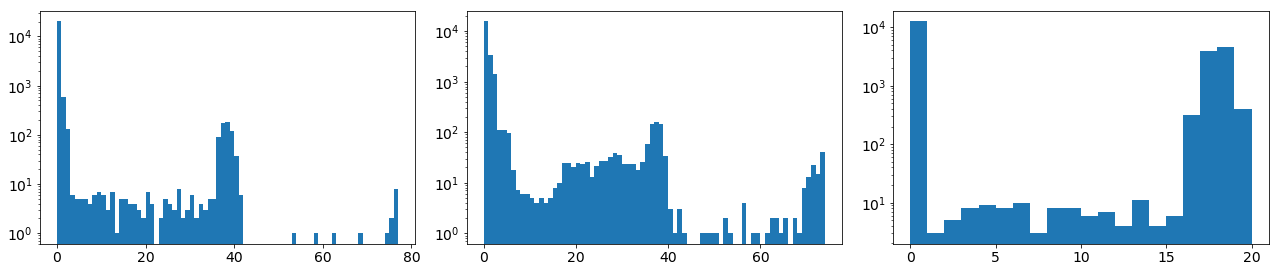

-- head --


,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,0.0,1.0,17.0
1,2006-12-16,17:25:00,0.0,1.0,16.0
2,2006-12-16,17:26:00,0.0,2.0,17.0
3,2006-12-16,17:27:00,0.0,1.0,17.0
4,2006-12-16,17:28:00,0.0,1.0,17.0


-- tail --


,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3
21987,2006-12-31,23:55:00,0.0,0.0,0.0
21988,2006-12-31,23:56:00,0.0,0.0,0.0
21989,2006-12-31,23:57:00,0.0,0.0,0.0
21990,2006-12-31,23:58:00,0.0,0.0,0.0
21991,2006-12-31,23:59:00,0.0,0.0,0.0


-------------------

table_name: yr_2007
-- description --


,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,521669.000000,521669.000000,521669.000000
mean,1.231716,1.637743,5.794556
std,6.455547,6.731144,8.186540
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,17.000000
max,78.000000,78.000000,20.000000


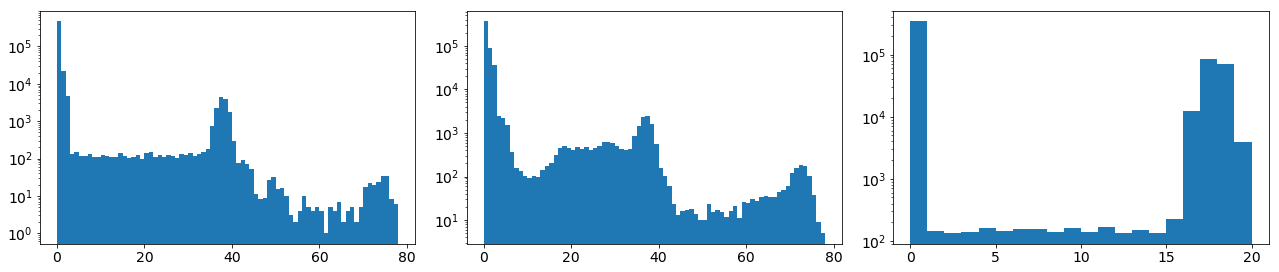

-- head --


,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2007-01-01,00:00:00,0.0,0.0,0.0
1,2007-01-01,00:01:00,0.0,0.0,0.0
2,2007-01-01,00:02:00,0.0,0.0,0.0
3,2007-01-01,00:03:00,0.0,0.0,0.0
4,2007-01-01,00:04:00,0.0,0.0,0.0


-- tail --


,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3
521664,2007-12-31,23:55:00,0.0,0.0,18.0
521665,2007-12-31,23:56:00,0.0,0.0,18.0
521666,2007-12-31,23:57:00,0.0,0.0,18.0
521667,2007-12-31,23:58:00,0.0,0.0,18.0
521668,2007-12-31,23:59:00,0.0,0.0,18.0


-------------------

table_name: yr_2008
-- description --


,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,526905.000000,526905.000000,526905.000000
mean,1.109847,1.256213,6.033701
std,6.140536,5.799238,8.226633
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,1.000000,17.000000
max,80.000000,76.000000,31.000000


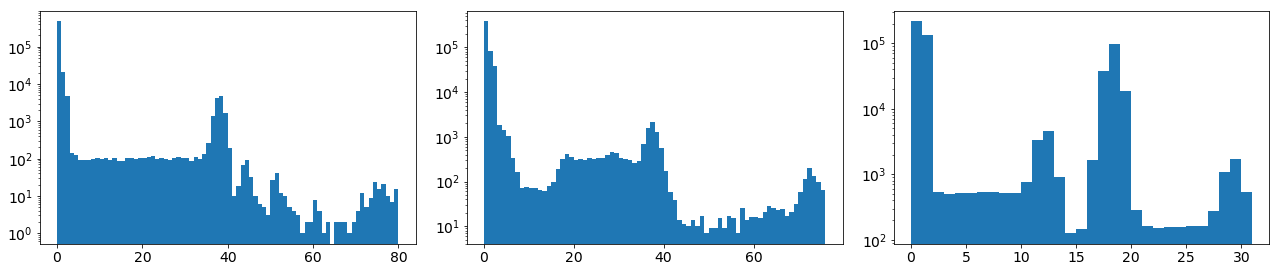

-- head --


,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2008-01-01,00:00:00,0.0,0.0,18.0
1,2008-01-01,00:01:00,0.0,0.0,18.0
2,2008-01-01,00:02:00,0.0,0.0,18.0
3,2008-01-01,00:03:00,0.0,0.0,18.0
4,2008-01-01,00:04:00,0.0,0.0,18.0


-- tail --


,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3
526900,2008-12-31,23:55:00,0.0,0.0,0.0
526901,2008-12-31,23:56:00,0.0,0.0,0.0
526902,2008-12-31,23:57:00,0.0,0.0,0.0
526903,2008-12-31,23:58:00,0.0,0.0,0.0
526904,2008-12-31,23:59:00,0.0,0.0,0.0


-------------------

table_name: yr_2009
-- description --


,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,521320.000000,521320.000000,521320.000000
mean,1.136839,1.135857,6.822712
std,6.265542,5.285837,8.571867
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,1.000000,18.000000
max,82.000000,77.000000,31.000000


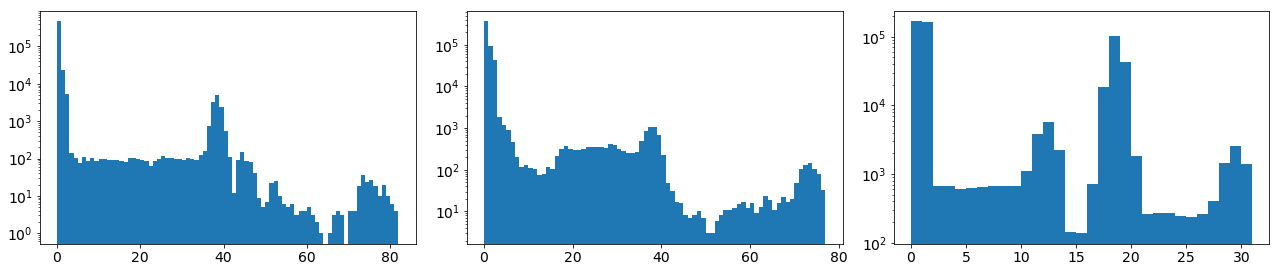

-- head --


,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2009-01-01,00:00:00,0.0,0.0,0.0
1,2009-01-01,00:01:00,0.0,0.0,0.0
2,2009-01-01,00:02:00,0.0,0.0,0.0
3,2009-01-01,00:03:00,0.0,0.0,0.0
4,2009-01-01,00:04:00,0.0,0.0,0.0


-- tail --


,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3
521315,2009-12-31,23:55:00,0.0,0.0,18.0
521316,2009-12-31,23:56:00,0.0,0.0,19.0
521317,2009-12-31,23:57:00,0.0,0.0,18.0
521318,2009-12-31,23:58:00,0.0,0.0,18.0
521319,2009-12-31,23:59:00,0.0,0.0,19.0


-------------------

table_name: yr_2010
-- description --


,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,457394.000000,457394.000000,457394.000000
mean,0.987521,1.101696,7.244024
std,5.635009,5.092035,8.698377
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,1.000000,18.000000
max,88.000000,80.000000,31.000000


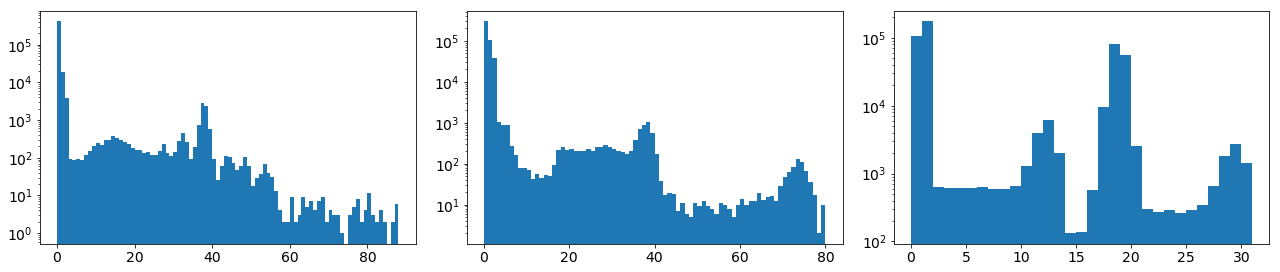

-- head --


,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2010-01-01,00:00:00,0.0,0.0,18.0
1,2010-01-01,00:01:00,0.0,0.0,18.0
2,2010-01-01,00:02:00,0.0,0.0,19.0
3,2010-01-01,00:03:00,0.0,0.0,18.0
4,2010-01-01,00:04:00,0.0,0.0,18.0


-- tail --


,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3
457389,2010-11-26,20:58:00,0.0,0.0,0.0
457390,2010-11-26,20:59:00,0.0,0.0,0.0
457391,2010-11-26,21:00:00,0.0,0.0,0.0
457392,2010-11-26,21:01:00,0.0,0.0,0.0
457393,2010-11-26,21:02:00,0.0,0.0,0.0


-------------------



In [129]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#https://matplotlib.org/users/customizing.html
mpl.rcParams['font.size'] = 14

def inspect_table_in_db(table_name):
    
    print('table_name:',table_name)
    df_subset = pd.read_sql('SELECT Date, Time, Sub_metering_1, Sub_metering_2, Sub_metering_3 FROM '+table_name, con=con)
    
    print('-- description --')
    display(df_subset.describe())
    
    i=1
    for header in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
        plt.subplot(1,3,i)
        plt.hist(df_subset[header],bins=int(np.max(df_subset[header])))
        plt.yscale('log')
        i+=1
    plt.tight_layout(rect=[0,0,3,1])
    plt.show()
    
    print('-- head --')
    display(df_subset.head())
    
    print('-- tail --')
    display(df_subset.tail())

for i in range(1,df_table_list.shape[0]):
    inspect_table_in_db(df_table_list.loc[i][0])
    print('-------------------\n')

### Create your Primary Data Frame

Let’s create a Multi-Year data frame that will serve as the primary data frame for the project.

In [130]:
df= pd.DataFrame()
for i in range(1,df_table_list.shape[0]):
    df_subset = pd.read_sql('SELECT Date, Time, Sub_metering_1, Sub_metering_2, Sub_metering_3 FROM '+df_table_list.loc[i][0], con=con)
    df = pd.concat((df, df_subset)).reset_index(drop=True)
display(df)
print('df.shape:',df.shape)

,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,0.0,1.0,17.0
1,2006-12-16,17:25:00,0.0,1.0,16.0
2,2006-12-16,17:26:00,0.0,2.0,17.0
3,2006-12-16,17:27:00,0.0,1.0,17.0
4,2006-12-16,17:28:00,0.0,1.0,17.0
5,2006-12-16,17:29:00,0.0,2.0,17.0
6,2006-12-16,17:30:00,0.0,1.0,17.0
7,2006-12-16,17:31:00,0.0,1.0,17.0
8,2006-12-16,17:32:00,0.0,1.0,17.0
9,2006-12-16,17:33:00,0.0,2.0,16.0


df.shape: (2049280, 5)


With the example above, create a primary data frame that ONLY includes the data frames that span an entire year.

Use str(), summary(), head() and tail() with your primary data frame. Are the dates in the correct order? If so, you are ready to move on to the next step. 

In [131]:
df.describe()

,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.121923e+00,1.298520e+00,6.458447e+00
std,6.153031e+00,5.822026e+00,8.437154e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.000000e+00
75%,0.000000e+00,1.000000e+00,1.700000e+01
max,8.800000e+01,8.000000e+01,3.100000e+01


In [132]:
df.head()

,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,0.0,1.0,17.0
1,2006-12-16,17:25:00,0.0,1.0,16.0
2,2006-12-16,17:26:00,0.0,2.0,17.0
3,2006-12-16,17:27:00,0.0,1.0,17.0
4,2006-12-16,17:28:00,0.0,1.0,17.0


In [133]:
df.tail()

,Date,Time,Sub_metering_1,Sub_metering_2,Sub_metering_3
2049275,2010-11-26,20:58:00,0.0,0.0,0.0
2049276,2010-11-26,20:59:00,0.0,0.0,0.0
2049277,2010-11-26,21:00:00,0.0,0.0,0.0
2049278,2010-11-26,21:01:00,0.0,0.0,0.0
2049279,2010-11-26,21:02:00,0.0,0.0,0.0


<font color = red> The data appears to be in the correct time order, but let's sort it just to be sure

In [134]:
df = df.sort_values('Date').reset_index(drop=True)

## Preprocessing

### DateTime
Now that you have your primary date frame you will need to apply data munging skills to create a DateTime attribute. DateTime is a special data type in the R environment. 

Since the Date and Time columns are separate they will need to be combined within the dataset in order to convert them to the correct format to complete the appropriate analysis. Here is an example of how this can be done in pandas

In [135]:
# Combine Date and Time attribute values in a new attribute column
df['DateTime'] = pd.to_datetime(df['Date']+' '+df['Time'])

In [136]:
## Move the DateTime attribute within the dataset
df = df.reindex(columns=['Date','Time','DateTime','Sub_metering_1','Sub_metering_2','Sub_metering_3'])

In [137]:
df['DateTime'].dtype

dtype('<M8[ns]')

In [138]:
df.head()

,Date,Time,DateTime,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,2006-12-16 17:24:00,0.0,1.0,17.0
1,2006-12-16,21:53:00,2006-12-16 21:53:00,0.0,2.0,17.0
2,2006-12-16,21:52:00,2006-12-16 21:52:00,0.0,1.0,17.0
3,2006-12-16,21:51:00,2006-12-16 21:51:00,0.0,1.0,17.0
4,2006-12-16,21:50:00,2006-12-16 21:50:00,0.0,2.0,17.0


You will now want to convert the new DateTime attribute to a 'UTC' (Univeral Time Coordinated) data type called. After converting to UTC we will add the time zone to prevent warning messages. The data description suggests that the data is from France.

In [139]:
df['DateTime'] = df['DateTime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Paris')
df = df.sort_values('DateTime')
print(df['DateTime'].dtype)

datetime64[ns, Europe/Paris]


In [140]:
#Inspect the new data-time formatting
df.head()

,Date,Time,DateTime,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,2006-12-16 18:24:00+01:00,0.0,1.0,17.0
268,2006-12-16,17:25:00,2006-12-16 18:25:00+01:00,0.0,1.0,16.0
267,2006-12-16,17:26:00,2006-12-16 18:26:00+01:00,0.0,2.0,17.0
266,2006-12-16,17:27:00,2006-12-16 18:27:00+01:00,0.0,1.0,17.0
265,2006-12-16,17:28:00,2006-12-16 18:28:00+01:00,0.0,1.0,17.0


### Extract Year Column
<font color= red> You can extract the month, year from a timestamp value using .month, .year command. To run this operation on each DateTime cell in our df, we use the pandas .map function and a lambda expression:

In [141]:
df['Year'] = df['DateTime'].map(lambda x: x.year)
df['Month'] = df['DateTime'].map(lambda x: x.month)
df['Day'] = df['DateTime'].map(lambda x: x.day)
df['Week'] = df['DateTime'].map(lambda x: x.week)

df['Year-Month'] = pd.to_datetime(df['Year'].astype('str')+'-'+df['Month'].astype('str'))

display(df.head())
display(df.tail())

,Date,Time,DateTime,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Week,Year-Month
0,2006-12-16,17:24:00,2006-12-16 18:24:00+01:00,0.0,1.0,17.0,2006,12,16,50,2006-12-01
268,2006-12-16,17:25:00,2006-12-16 18:25:00+01:00,0.0,1.0,16.0,2006,12,16,50,2006-12-01
267,2006-12-16,17:26:00,2006-12-16 18:26:00+01:00,0.0,2.0,17.0,2006,12,16,50,2006-12-01
266,2006-12-16,17:27:00,2006-12-16 18:27:00+01:00,0.0,1.0,17.0,2006,12,16,50,2006-12-01
265,2006-12-16,17:28:00,2006-12-16 18:28:00+01:00,0.0,1.0,17.0,2006,12,16,50,2006-12-01


,Date,Time,DateTime,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Week,Year-Month
2048434,2010-11-26,20:58:00,2010-11-26 21:58:00+01:00,0.0,0.0,0.0,2010,11,26,47,2010-11-01
2048433,2010-11-26,20:59:00,2010-11-26 21:59:00+01:00,0.0,0.0,0.0,2010,11,26,47,2010-11-01
2048432,2010-11-26,21:00:00,2010-11-26 22:00:00+01:00,0.0,0.0,0.0,2010,11,26,47,2010-11-01
2048861,2010-11-26,21:01:00,2010-11-26 22:01:00+01:00,0.0,0.0,0.0,2010,11,26,47,2010-11-01
2049279,2010-11-26,21:02:00,2010-11-26 22:02:00+01:00,0.0,0.0,0.0,2010,11,26,47,2010-11-01


In [142]:
# ## Save the Data
# df.to_csv('df_Sub_metering_123.csv',index=False)

## Perform and Initial Exploration of the Data

Now that you have converted the date and time appropriately you can begin to obtain some information from the data set.

### Data Documentation

If you haven't done so already, review the Electric Power Consumption Data Set documentation in the resources tab (UCI Machine Learning Repository). Documentation includes an overview, percent of missing data and much more. You should pay special attention to attribute information and what is associated with each of the sub-meters. 

#### Electric Power Consumption Data Set

The electric power consumption data set can be downloaded from the UC Irvine Machine Learning Repository:

(http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption)


![](figures/dataset_overview_snapshot.png)

##### Attribute Information:

1. date: Date in format dd/mm/yyyy 
2. time: time in format hh:mm:ss 
3. global_active_power: household global minute-averaged active power (in kilowatt) 
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
5. voltage: minute-averaged voltage (in volt) 
6. global_intensity: household global minute-averaged current intensity (in ampere) 
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

### Gather summary statistics

* Using the summary() command calculate the mean, mode, standard deviation, quartiles & characterization of the distribution and maybe more.
* Which sub-meter is using the most power? The least? Is there anything to learn from the max and min? 
* Optional: Research other basic statistics available in R that may yield additional insights.

In [143]:
# df = pd.read_csv('df_Sub_metering_123.csv')

In [144]:
df.describe()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Week
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.121923e+00,1.298520e+00,6.458447e+00,2.008425e+03,6.455223e+00,1.571190e+01,2.630840e+01
std,6.153031e+00,5.822026e+00,8.437154e+00,1.124344e+00,3.423177e+00,8.801285e+00,1.497875e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,2.007000e+03,3.000000e+00,8.000000e+00,1.300000e+01
50%,0.000000e+00,0.000000e+00,1.000000e+00,2.008000e+03,6.000000e+00,1.600000e+01,2.600000e+01
75%,0.000000e+00,1.000000e+00,1.700000e+01,2.009000e+03,9.000000e+00,2.300000e+01,3.900000e+01
max,8.800000e+01,8.000000e+01,3.100000e+01,2.010000e+03,1.200000e+01,3.100000e+01,5.300000e+01


In [145]:
#Import matplotlib and set graphics options
import matplotlib.pyplot as plt
import matplotlib as mpl

#https://matplotlib.org/users/customizing.html
mpl.rcParams['font.size'] = 14

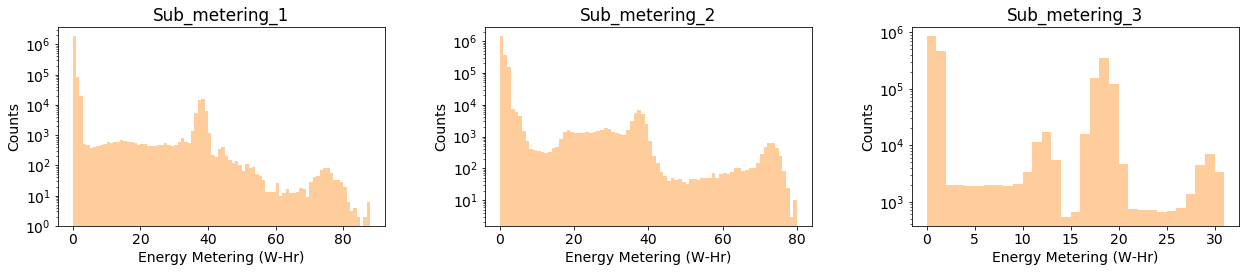

In [146]:
#Plot histograms
header_list = ['Sub_metering_1','Sub_metering_2','Sub_metering_3']
colors = plt.cm.gist_heat(np.linspace(.9,.9,len(header_list)))
i=0
for header in header_list:
    plt.subplot(1,3,i+1)
    plt.title(header)
    plt.hist(df[header],bins=int(np.max(df[header])),color=colors[i])
    plt.yscale('log')
    plt.xlabel('Energy Metering (W-Hr)')
    plt.ylabel('Counts')
    i+=1
plt.tight_layout(rect=(0,0,3,1))
plt.show()

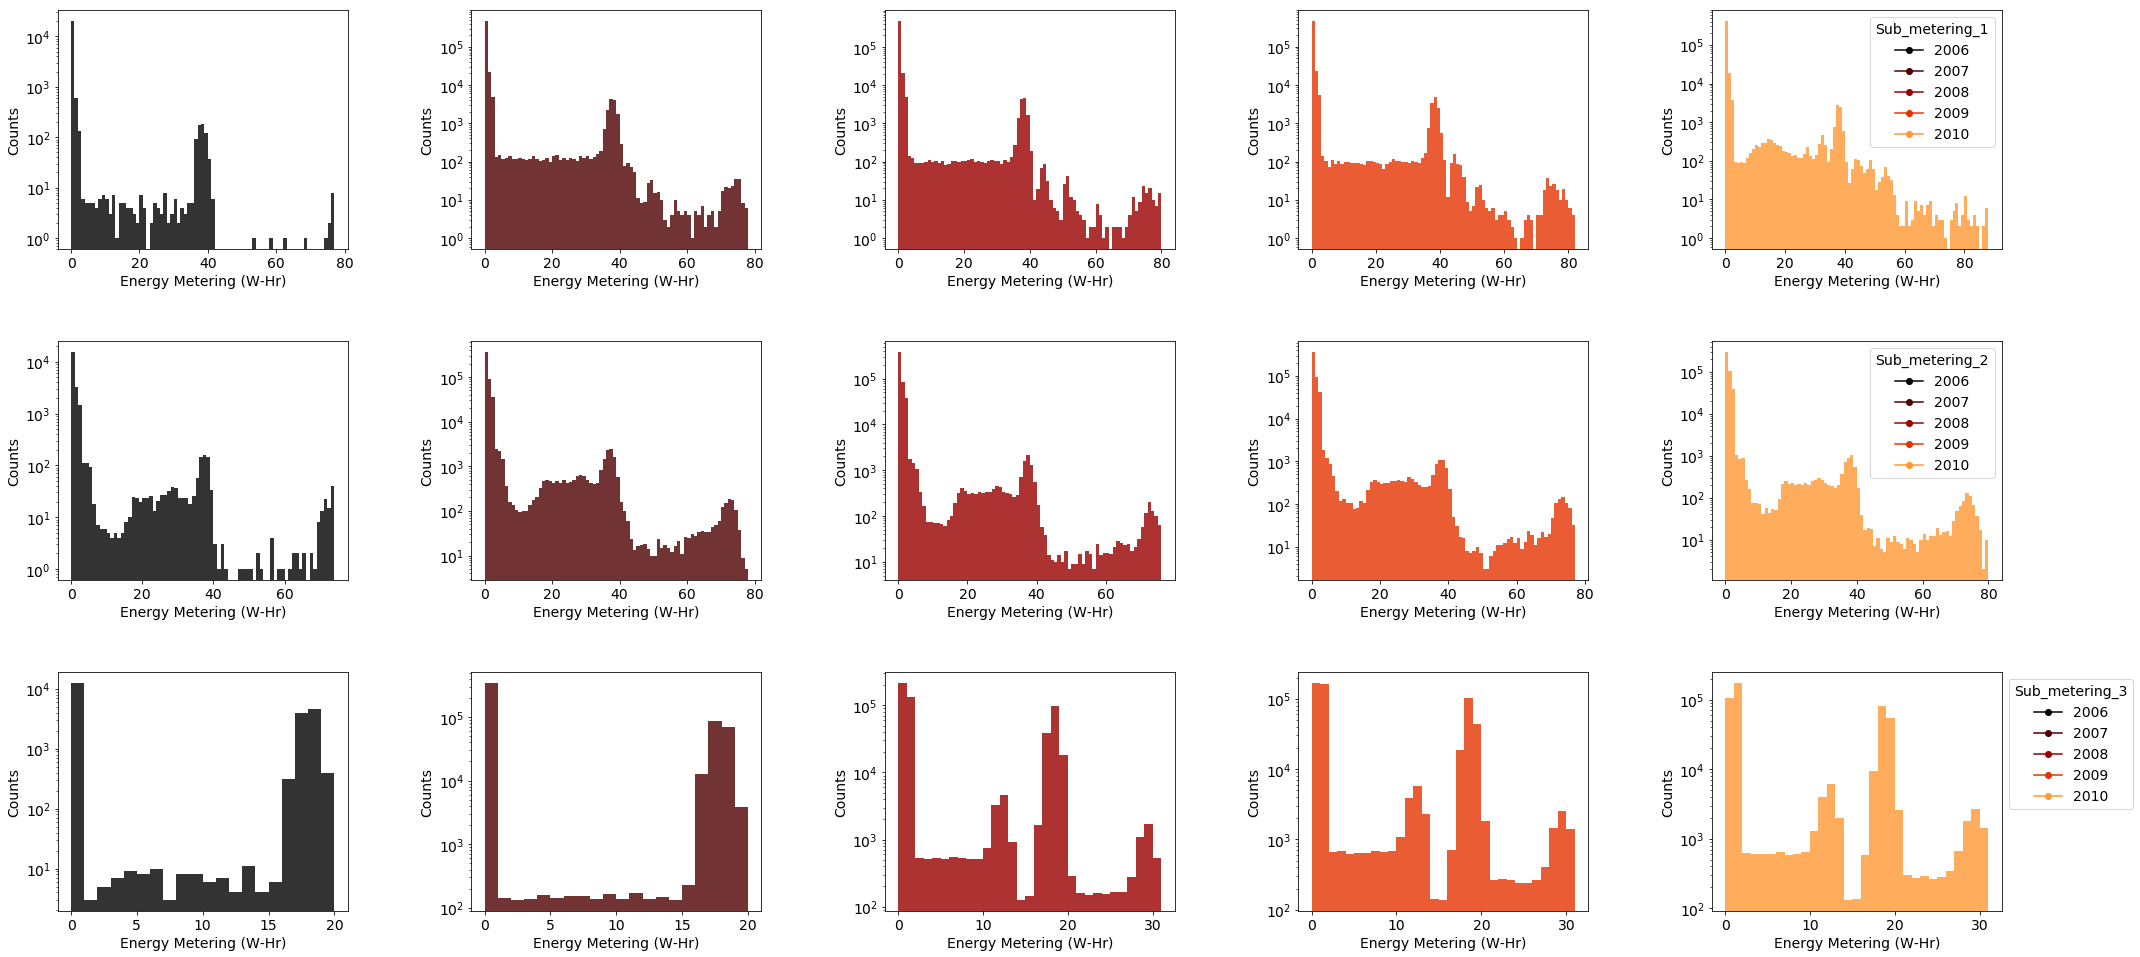

In [147]:
years_list = list(df['Year'].unique())
colors = plt.cm.gist_heat(np.linspace(0,.8,len(years_list)))
legend_lines = [mpl.lines.Line2D([0],[0],linestyle=None,marker='o',color=c) for c in colors]
i=0
header_list = ['Sub_metering_1','Sub_metering_2','Sub_metering_3']
for header in header_list:
    j=0
    for year in years_list:
        df_by_year = df[df['Year']==year][[header]]
        plt.subplot(3,5,i+1)
        plt.hist(df_by_year[header],bins=int(np.max(df_by_year[header])),color=colors[j],alpha=0.8)
        plt.yscale('log')
        plt.xlabel('Energy Metering (W-Hr)')
        plt.ylabel('Counts')
        #plt.title(header+'\n'+str(year))
        i+=1
        j+=1
    plt.legend(legend_lines, years_list, title=header, bbox_to_anchor = (1,1))
    
plt.tight_layout(rect=(0,0,5.,3.5))
plt.show()
    

In [148]:
#Calculate Cumulative energy useage
for header in header_list:
    print('Cumulative Energy Useage for '+header+':\t'+str(round(df[header].sum(),0))+' W-Hr')

Cumulative Energy Useage for Sub_metering_1:	2299135.0 W-Hr
Cumulative Energy Useage for Sub_metering_2:	2661031.0 W-Hr
Cumulative Energy Useage for Sub_metering_3:	13235167.0 W-Hr


In [149]:
#Set DateTime as index for simplified plotting
df = df.set_index('DateTime')

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


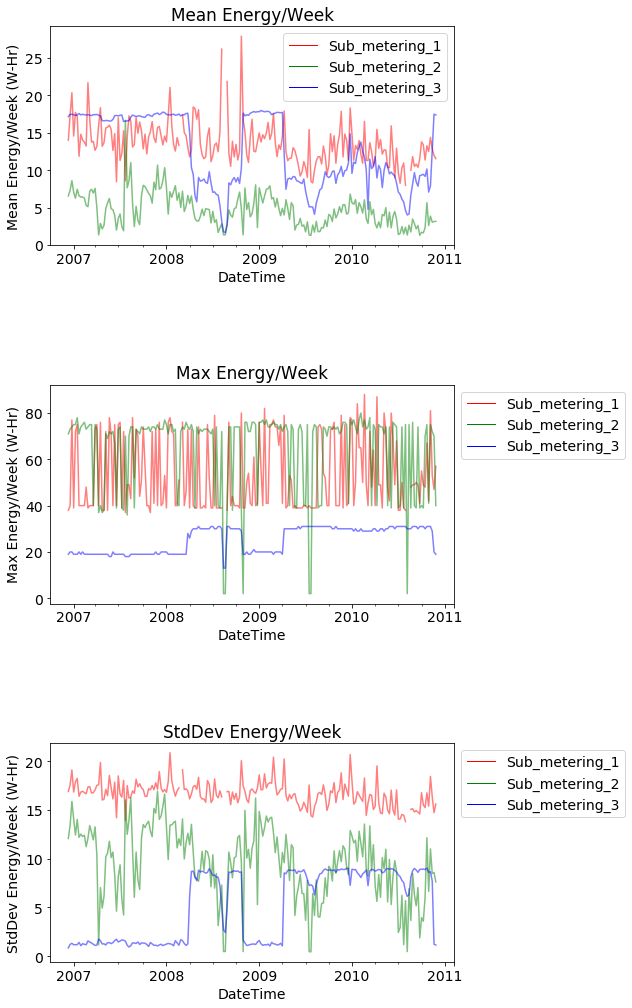

In [150]:
#Plot trends by group of data
fig, ax = plt.subplots()
colors = ['r','g','b']
legend_lines = [mpl.lines.Line2D([0], [0], color=c, lw=1) for c in colors] 
legend_labels=header_list
i=0

for header in header_list:
    
    df_subset = df[[header]]
    df_subset = df_subset[df_subset[header]>0] #drop the 0 data
    
    df_group_mean = df_subset.resample('W').mean()
    df_group_max = df_subset.resample('W').max()
    df_group_stddev = df_subset.resample('W').std()
    
    plt.subplot(311)
    df_group_mean[header].plot(color = colors[i],alpha=0.5)
    plt.title('Mean Energy/Week')
    plt.ylabel('Mean Energy/Week (W-Hr)')
    plt.legend(legend_lines, legend_labels, bbox_to_anchor=(1,1))
    
    plt.subplot(312)
    df_group_max[header].plot(color = colors[i],alpha=0.5)
    plt.title('Max Energy/Week')
    plt.ylabel('Max Energy/Week (W-Hr)')
    plt.legend(legend_lines, legend_labels, bbox_to_anchor=(1,1))
    
    plt.subplot(313)
    df_group_stddev[header].plot(color = colors[i],alpha=0.5)
    plt.title('StdDev Energy/Week')
    plt.ylabel('StdDev Energy/Week (W-Hr)')
    plt.legend(legend_lines, legend_labels, bbox_to_anchor=(1,1))
    
    i+=1

plt.tight_layout(rect=(0,0,1.5,3.8))
plt.show()

/Users/johnleonard/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


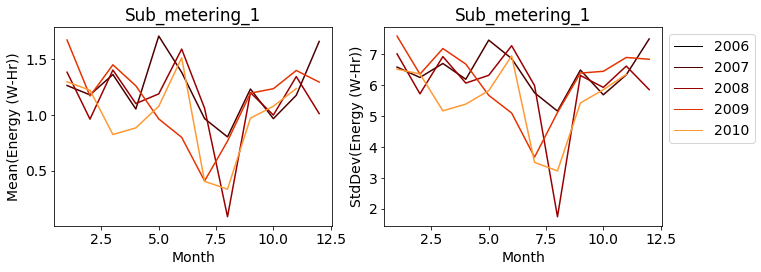

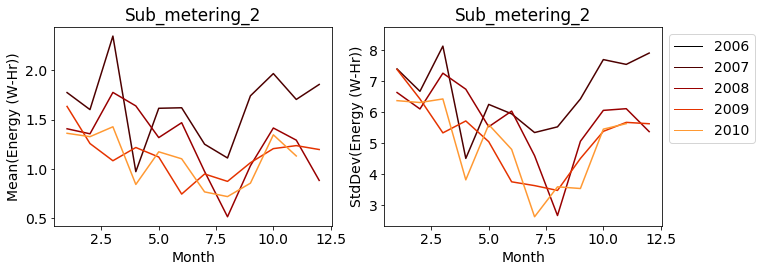

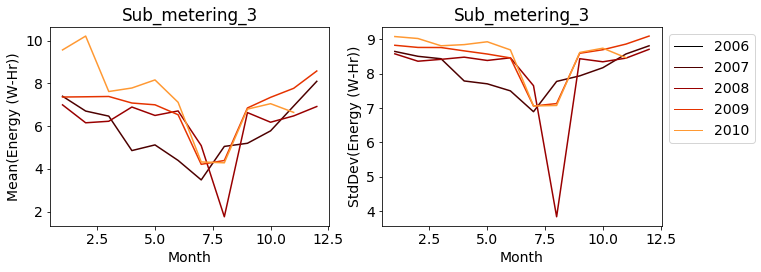

In [108]:
#Plot seasonality trends for each meter (using rolling average)
rolling_window = 10000
for header in header_list:
    df_subset_by_meter = df[[header,'Year','Month','Week']]
    years_list = list(np.sort(df_subset_by_meter['Year'].unique()))
    legend_labels = years_list
    colors = plt.cm.gist_heat(np.linspace(0, .8, len(years_list)))
    legend_lines = [mpl.lines.Line2D([0], [0], color=c, lw=1) for c in colors]
    i=0
    for year in years_list:
        plt.subplot(121)
        plt.title(header)
        df_subset_by_meter_and_year = df_subset_by_meter[df_subset_by_meter['Year']==year][[header,'Month','Week']]
        df_subset_by_meter_and_year_mean = df_subset_by_meter_and_year.groupby('Month').mean()
        plt.plot(df_subset_by_meter_and_year_mean.index.values,df_subset_by_meter_and_year_mean[header],color = colors[i])
        plt.xlabel('Month')
        plt.ylabel('Mean(Energy (W-Hr))')
        #plt.legend(legend_lines,legend_labels)
        
        plt.subplot(122)
        plt.title(header)
        df_subset_by_meter_and_year_stddev = df_subset_by_meter_and_year.groupby('Month').std()
        plt.plot(df_subset_by_meter_and_year_stddev.index.values,df_subset_by_meter_and_year_stddev[header],color = colors[i])
        plt.xlabel('Month')
        plt.ylabel('StdDev(Energy (W-Hr))')
        plt.legend(legend_lines,legend_labels,bbox_to_anchor=(1,1))
        
        i+=1
    
    plt.tight_layout(rect=[0,0,1.8,1])
    plt.show()
    

# Produce a Presentation

After research, initial exploration of the data and selecting a data science process, it's time to build your presentation for the client kick-off meeting. Your presentation should be built with PowerPoint(or similar) and be very polished and professional.  

Here is the outline IOT typically used for our onboarding presentations: 

Create a report to your client's management in the form of a PowerPoint presentation. Your report should include:

Cover Slide
* Agenda – What will be discussed in the presentation?
* Background – What is the context of this project?
* Objective/Goals – What is IOT Analytics being asked to do? What does the client want from this work?
* Data Management - An explanation of how you will manage the data and security for the data during the project.
* Descriptions and location of related data.
* Any known issues with the data and how you plan to address them.
* Descriptive statistics you gathered as an initial step in analysis.
* High-Level Recommendations – Three or more recommendations about the existing data. What would you change or add to the data?
* Closing Slide

TIP:
Remember that your report is intended for business rather than technical people. Consider the things likely to be important to a business person and the things likely to confuse them. If you believe that a technical detail is likely to be important, think about how best to explain it to a business audience.